<a href="https://colab.research.google.com/github/HanJaeHui-GitHub/ESAA/blob/main/ESAA_YB_Week8_markdown(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8주차 과제_1104(월)

파이썬 머신러닝 완벽가이드 ch5. 1~5 pg. 308~337

## 회귀 소개

**회귀**

데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
    
여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭함
    
ex) $Y=W_1X_1+W_2X_2+⋯+W_nX_n$

→ $Y$ : 종속변수, $X_1,X_2,⋯,X_n$ : 독립변수, $W_1,W_2,⋯,W_n$ : 회귀 계수

머신러닝 회귀 예측의 핵심 = 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

|독립변수 개수|회귀 계수의 결합|
|--|--|
|1개 : 단일 회귀|선형 : 선형 회귀|
|여러 개 : 다중 회귀|비선형 : 비선형 회귀|

지도학습

1. 분류 → 예측값이 카테고리와 같은 이산형 클래스 값

2. 회귀 → 예측값이 연속형 숫자 값

<대표적인 선형 회귀 모델>

- 일반 선형 회귀  :  예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며 규제(Regularization)를 적용하지 않은 모델

- 릿지(Ridge) : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델

- 라쏘(Lasso) : 라쏘 회귀는 선형 회귀에 L1 규제를 추가한 회귀 모델, L1 규제는 예측 영향력이 작은 피처의  회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것, 피처 선텍 기능으로 불리기도 함

- 엘라스틱넷(ElasticNet) : L2, L1 규제를 결합한 모델, 주로 피처가 많은 데이터 세트에 적용, L1으로 피처 개수를 줄임 + L2로 계수 값 크기 조정

- 로지스틱 회귀(Logistic Regression) : 로지스틱 회귀는 분류에 사용되는 선형 모델로 매우 강력한 분류 알고리즘임, 이진 분류뿐만 아니라 희소 영역의 분류(ex.텍스트 분류) 같은 영역에서 뛰어난 예측 성능을 보임

## 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀  : 독립변수도 하나, 종속변수도 하나인 선형 회귀

$ Ŷ = w_0+w_1X$

회귀 계수  : 기울기 $w_1$, 절편 $w_0$

잔차 = 실제 값과 회귀 모델의 차이에 따른 오류 값

최적의 회귀 모델을 만든다는 것 → 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델 만들기

- 오류 합 계산하는 방법

    절대값을 취해서 더하기(MAE, Mean Absolute Error)
    
    오류 값의 제곱을 구해서 더하기(RSS, Residual Sum of Square), $Error^2 = RSS$

비용 함수, 손실 함수(loss function)


$$RSS(w_0, w_1) = \frac{1}{N}∑_{i=1}^{N}(y_i-(w_0+w_1*x_i))^2$$

머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값 즉, 오류 값을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것

## 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

비용 함수가 최소가 되는 W 파라미터를 구할 때 W 파라미터의 개수가 적으면 고차원 방정식으로 비용 함수가 최소가 되는 W 변숫값을 도출할 수 있지만 W 파라미터가 많으면 고차원 방정식을 동원하더라도 해결하기 어려움 → 경사 하강법을 이용해 고차원 방정식에 대한 문제 해결 가능

**경사 하강법** : 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식, 직관적이고 빠르게 W 파라미터를 구할 수 있음

<비용 함수>

$$R(w)=\frac{1}{N}∑_{i=1}^N(y_i-(w_0+w_1*x_i))^2$$

위의 식을 미분하여 미분 함수의 최솟값을 구해야 하는데 두 개의 w 파라미터인 $w_0$, $w_1$을 가지고 있기 때문에 각 변수에 편미분을 적용해야 함

<편미분 적용한 공식>

$$\frac{∂R(w)}{∂w_1}=\frac{2}{N}∑_{i=1}^{N}-x_t*(y_i-(w_0+w_1x_i))=-\frac{2}{N}∑_{i=1}^{N}x_i*(실제값_i-예측값_i)$$

$$\frac{∂R(w)}{∂w_0}=\frac{2}{N}∑_{i=1}^{N}-(y_i-(w_0+w_1x_i))=-\frac{2}{N}∑_{i=1}^{N}(실제값_i-예측값_i)$$

$새로운\ w_1=이전\ w_1-(-\frac{2}{N}∑_{i=1}^Nx_i*(실제값_i-예측값_i))$을 이용하여 업데이터 진행, 이때 편미분 값이 너무 클 수 있기 때문에 보정 계수 η를 곱하는데 이를 '학습률이라고 함

<경사 하강법의 일반적인 프로세스>

1. $w_1,\ w_0$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산

2. $w_1$을 $w_1+η\frac{2}{N}∑_{i=1}^Nx_i*(실제값_i-예측값_i)$, $w_0$을 $w_0+η\frac{2}{N}∑_{i=1}^N(실제값_i-예측값_i)$으로 업데이트한 후 다시 비용 함수의 값을 계산함

3. 비용 함수가 감소하는 방향성으로 주어진 횟수만큼 2번을 반복하면서 $w_1$과 $w_0$를 계속 업데이트함

##### 간단한 회귀식 y=4X+6을 근사하기 위한 100개의 데이터 세트를 만들고 경사 하강법을 이용해 회귀계수 $w_1$, $w_0$ 도출하는 파이썬 코드

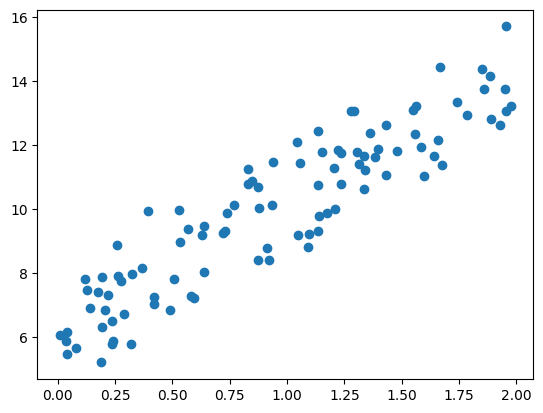

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [2]:
# 비용 함수 정의
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [3]:
# w1rhk w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    # 먼저 w1_update, w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1,w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [5]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X + w0
print('Gradient Desccent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Desccent Total Cost:0.9935


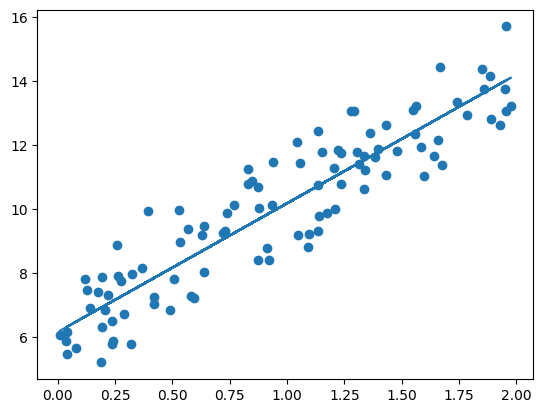

In [6]:
# 앞서 구한 y_pred에 기반해 회귀선 그리기
plt.scatter(X, y)
plt.plot(X, y_pred)

경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용 함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 오래 걸림 → 실전에서 대부분 확률적 경사 하강법(Stochastic Gradient Descent)을 이용함

확률적 경사 하강법 :  전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아닌 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도 보장

In [7]:
# (미니 배치) 확률적 경사 하강법 함수 구현하기
## 앞서 생성한 gradient_descent_steps()와 크게 다르지 않지만 전체 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 게산하는 부분에 차이 있음
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochasctic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochasctic_random_index[0:batch_size]]
        sample_y = y[stochasctic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [8]:
# w1, w0 및 예측 오류 비용 계산
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print("w1:", round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.993711


피처가 M개($X_1,\ X_2,\ ⋯,\ X_{100}$)이면 그에 따른 회귀 계수는 M+1(1개는 $w_0$)개 도출됨

<피처가 여러 개일때 예측 회귀식>

$$Ŷ=w_0+w_1*X_1+w_2*X_2+⋯+w_{100}*X_{100}$$




## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares

LinearRegression 클래스 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스

fit() 매서드로 X, y 배열을 입력받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)

[입력 파라미터]

fit_intercept : 불린 값으로 디폴트는 Trueintercept(절편) 값을 계산할지 말지 지정, 만일 False로 지정하면 intercept가 사용되지 않고 0으로 지정

normalize : 교과서에 나와있지만 더 이상 지원하지 않음

[속성]

coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성, Shape는 (Target 값 개수, 피처 개수)

intercept_ : intercept 값

Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처 간의 상관관계가 매우 높을수록 분산이 매우 커져서 오류에 민감해짐

↪ 이러한 현상을 **다중공선성(multi-collinearity)** 문제라고 함

[해결 방법]

독립적인 중요한 피처만 남기고 제거하거나 규제 적용

PCA를 통해 차원 축소를 수행

## 회귀 평가 지표

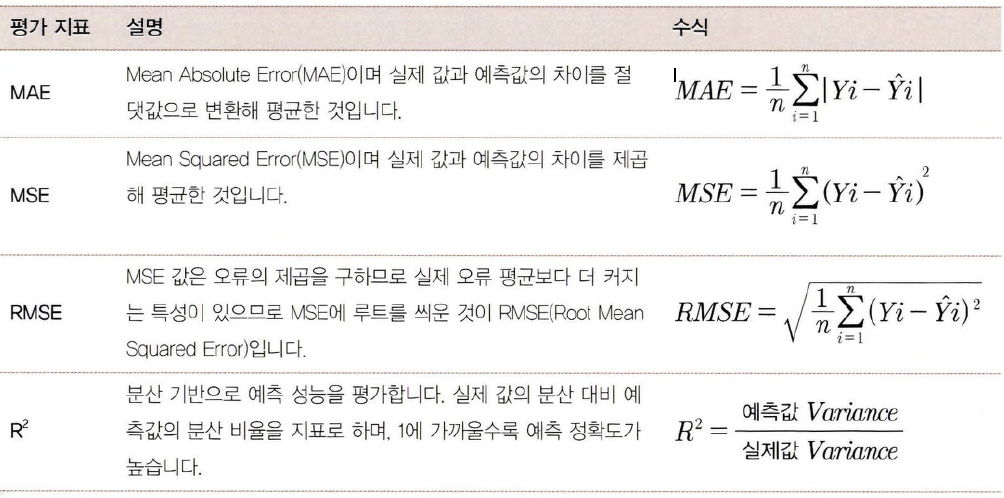
이외에도 MSE나 RMSE에 로그를 적용한 MSLE(Mean Squared Log Error)와 RMSLE(Root Mean Squared Log Error)도 사용

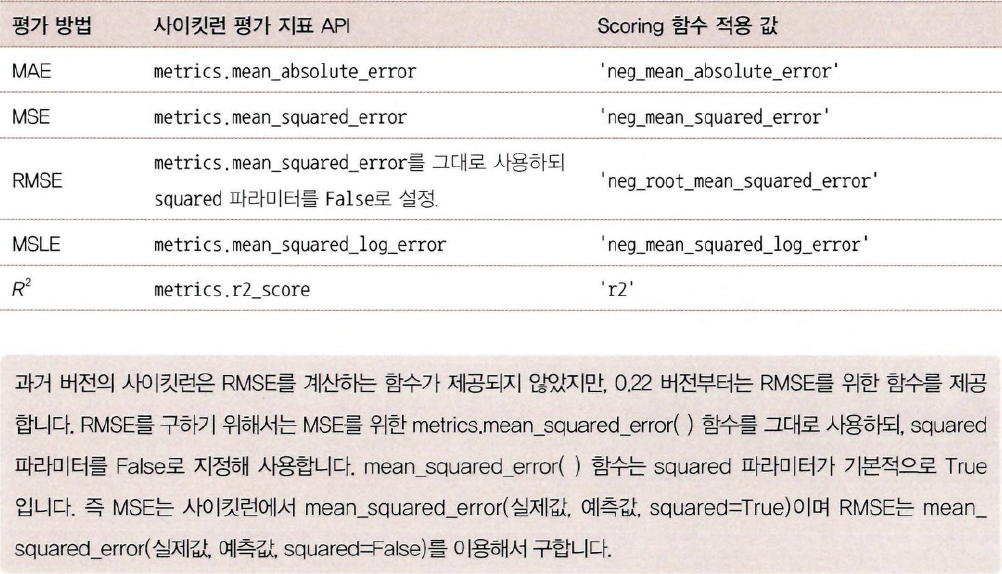

회귀 평가 지표를 적용할 떄 유의할 점

MAE의 scoring 파라미터 값을 살펴보면 'neg_'라는 접두어가 붙어 있는데 MAE는 절댓값의 합이기 때문에 음수가 될 수 없음

그러나 Scoring 함수에 'neg_mean_absolute_error'를 적용해 음수 값을 반환하는 이융는 사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문

MAE가 크다는 것은 오히려 나쁜 모델이라는 것을 의미하는 것이기 때문에 이를 Scoring 함수에 반영하려면 보정이 필요하기 때문에 음수로 만들어 보정해줌

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

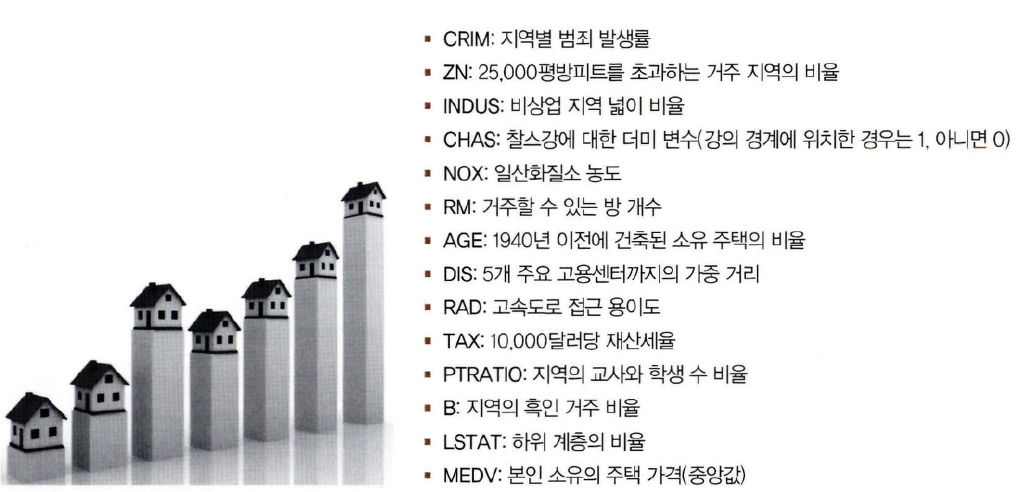

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
boston = pd.read_csv('/content/Boston.csv')
bostonDF = boston.drop('medv', axis=1)

# boston 데이터 세트의 medv를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.medv
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 15)


Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  PRICE  
0  296     15.3  396.90   4.98   24.0  
1  242     17.8  396.90   9.14   21.6  
2  242     17.8  392.83   4.03   34.7  
3  222     18.7  394.63   2.94   33.4  
4  222     18.7  396.90   5.33   36.2

In [15]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


데이터 세트 피처의 Null 값은 없으며 모두 float형임

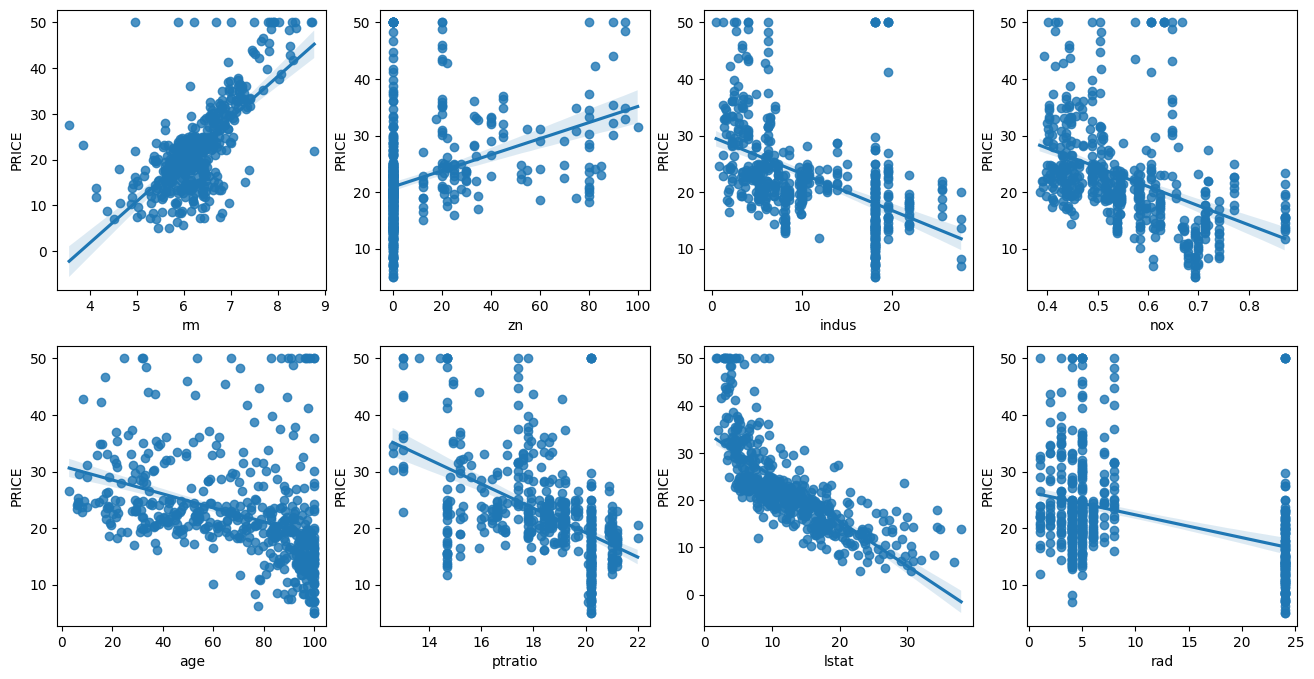

In [16]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['rm','zn','indus','nox','age','ptratio','lstat','rad']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도의 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남

RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 큼 = 방의 크기가 클수록 가격이 증가함

LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 큼 = LSTAT이 적을수록 PRICE가 증가함

In [17]:
# LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 만들기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['Unnamed: 0','PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [18]:
# LinearRegression으로 생성한 주택가격 모델의 intercept(절편)과 coefficients(회귀 계수) 값
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [19]:
# coef_속성은 회귀 계수 값만 가지고 있으므로 이르르 피처별 회귀 계수 값으로 다시 매핑하고 높은 값 순으로 출력하기
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

rm          3.4
chas        3.0
rad         0.4
zn          0.1
indus       0.0
age         0.0
tax        -0.0
black       0.0
crim       -0.1
lstat      -0.6
ptratio    -0.9
dis        -1.7
nox       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커보임

In [20]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['Unnamed: 0','PRICE'], axis=1, inplace=False)
Ir = LinearRegression()

# cross_val_score( )로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="negjnean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE:{0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE:5.829


## 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해

다항(polynomial) 회귀 : 회귀가 독립변수의 단항식이 아닌 2,3차 방정식과 같은 다항식으로 표현되는 것

$$y=w_0+w_1x_1+w_2x_2+w_3x_1x_2+w_4w_1^2+w_5x_2^2$$

다항 회귀는 선형 회귀임!!

선형/비선형 회귀를 나누는 기준 → 회귀 계수가 선형/비선형인지에 따른 것

사이킷런은 다항 회귀 클래스를 제공하지 않기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현함



In [21]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1].[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)

# degree=2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [22]:
# 3차 다항 계수를 이용해 3차 다항 회귀 함수식의 회귀 계수 예측하기
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [23]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [26]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


일차 단항식 계수 피처는 2개였지만 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어남

In [27]:
# Pipeline 객체를 이용해 한 번에 다항 회귀 구현하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) :
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('Poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항식의 차수가 높아질수록 매우 복잡한 피초 간의 관계 모델링 가능

그러나 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져 정작 테스트 데이터 환경에서는 예측 정확도가 떨어짐 → 과적합 문제 발생

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 x 값에 대해 코사인 변환 값을 반환
def true_fun(X) :
    return np.cos(1.5*np.pi *X)

# X 는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


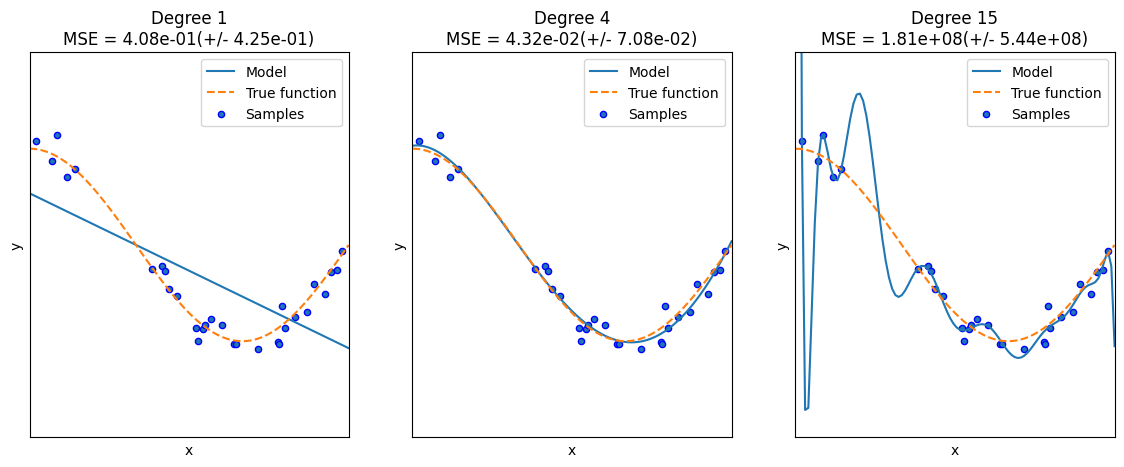

In [30]:
# 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과 비교

plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수 (degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i +1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수를 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'. format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label = 'True function')
    plt.scatter(X, y, edgecolor = 'b', s= 20, label='Samples')

    plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

실선 : 다항 회귀 예측 곡선

점선 : 실제 데이터 세트 X,Y 코사인 곡선

학습 데이터 : 0부터 1까지의 30개 임의의 X 값과 그에 따른 코사인 Y값에 잡음을 변동 값으로 추가해 구성

MSE 평가 : 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해 평균한 것

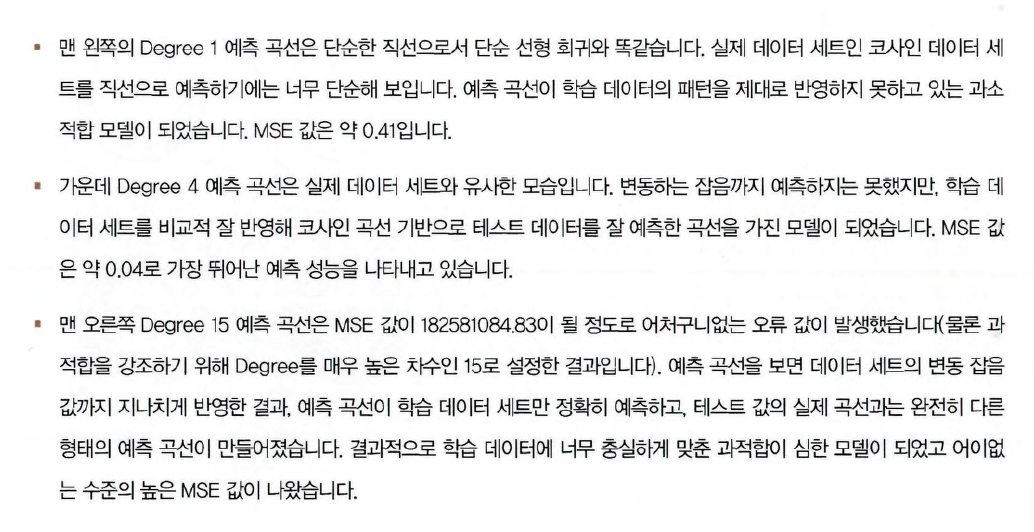

학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 (Balanced) 모델이 좋은 예측 모델

## 편향 - 분산 트레이드오프(Bias - Variance Trade off)

고편향성(High Bias) : 매우 단순화된 모델로 지나치게 한 방향성으로 치우친 경향이 있음

고분산성(High Variance) : 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되어 지나치게 높은 변동성을 가짐

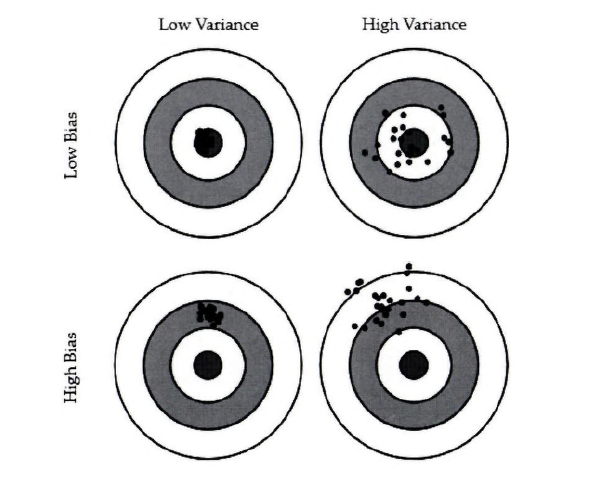

편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있음

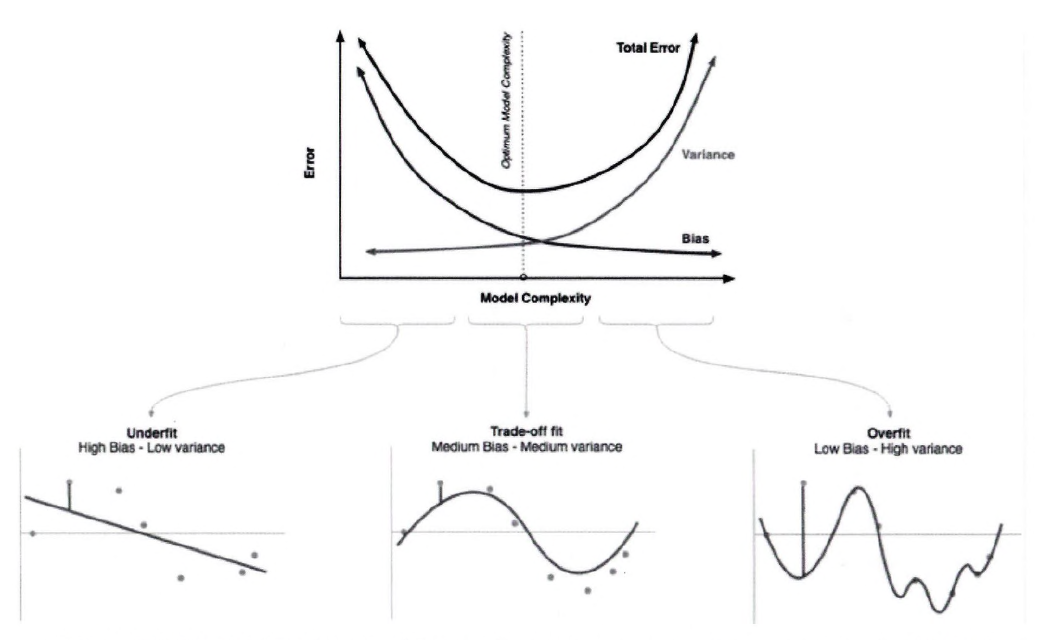

높은 편향/낮은 분산에서 과소적합되기 쉬움

낮은 편향/높은 분산에서 과적합되기 쉬움

편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 법임